usage: python3 plot_script.py dataset1 dataset2 motif_size

In [1]:
import graph_tool.all as gt
import networkx as nx
import matplotlib.pyplot as plt
import math
import sys

In [3]:
#filename1 = sys.argv[1]
#filename2 = sys.argv[2]
filename1 = "data/yeast8k.graphml"
filename2 = "data/ecoli2k.graphml"

Read data

In [4]:
data1 = gt.load_graph(filename1)
data2 = gt.load_graph(filename2)

In [5]:
no_self_data1 = data1.copy()
no_self_data2 = data2.copy()
for a_graph in [no_self_data1, no_self_data2]:
    gt.remove_self_loops(a_graph)

In [12]:
def run_experiment(dataset):
    #subg_size = int(sys.argv[3])
    subg_size = 3
    graph = dataset
    motiflist = gt.motifs(graph,subg_size,return_maps=True)
    motifs_nx = list()
    for subg in motiflist[0]:
        el = list() 
        el += subg.iter_edges()
        motifs_nx += [nx.from_edgelist(el,create_using=nx.DiGraph())]
    sig_list = gt.motif_significance(graph,subg_size,shuffle_model="erdos")
    return motifs_nx, sig_list, motiflist

In [95]:
def qt_draw(g,axis_pos, color):
    pos = nx.spring_layout(g)
    #nx.draw_networkx(G=g, pos=pos,node_size=100, ax=axis_pos, with_labels=False,connectionstyle="arc3,rad=0.2",node_color="#750101",edgecolors="#000000")
    nx.draw_networkx(G=g, pos=pos,node_size=100, ax=axis_pos, with_labels=False,connectionstyle="arc3,rad=0.2",node_color=color,edgecolors="#000000")

run experiments and store the results

In [96]:
motifs_nx1, sig_list1, motiflist1 = run_experiment(no_self_data1)
motifs_nx2, sig_list2, motiflist2 = run_experiment(no_self_data2)

In [111]:
%matplotlib inline
def plot_motifs(title, motiflist, sig_list, motifs_nx, plot_color):
    plt.rcParams.update({'font.size': 6})
    plt.rcParams['figure.dpi'] = 450
    n_motifs    = len(motiflist[0])
    base        = math.ceil(math.sqrt(n_motifs))
    height      = math.ceil(n_motifs/base)
    fig, ax     = plt.subplots(height, base, figsize=(12, 10))
    fig.suptitle(f"{title} motifs",fontsize=16)
    for i,motif in enumerate(motifs_nx,1):
        try:
            y = ((i-1) % base)
            x = math.floor((i-1)/base)
            ax[x,y].set_title(f"m{i}, #{motiflist[1][i-1]}")
            qt_draw(g=motif,axis_pos=ax[x,y], color=plot_color)
        except IndexError:
            print(i,x,y)
    n = list()
    for i in range(1, n_motifs+1):
    #for i in range(1, len(sig_list[1])+1):
        n += [f"m{i}"]
    #ax[2,3].bar(n,sig_list[1],color="darkred",edgecolor="black",linewidth=1)
    #ax[2,3].set_title("Z-scores")
    plt.bar(n,sig_list1[1][0:len(n)],color=plot_color,edgecolor="black",linewidth=1)
    plt.title("Z-scores")
    plt.show()

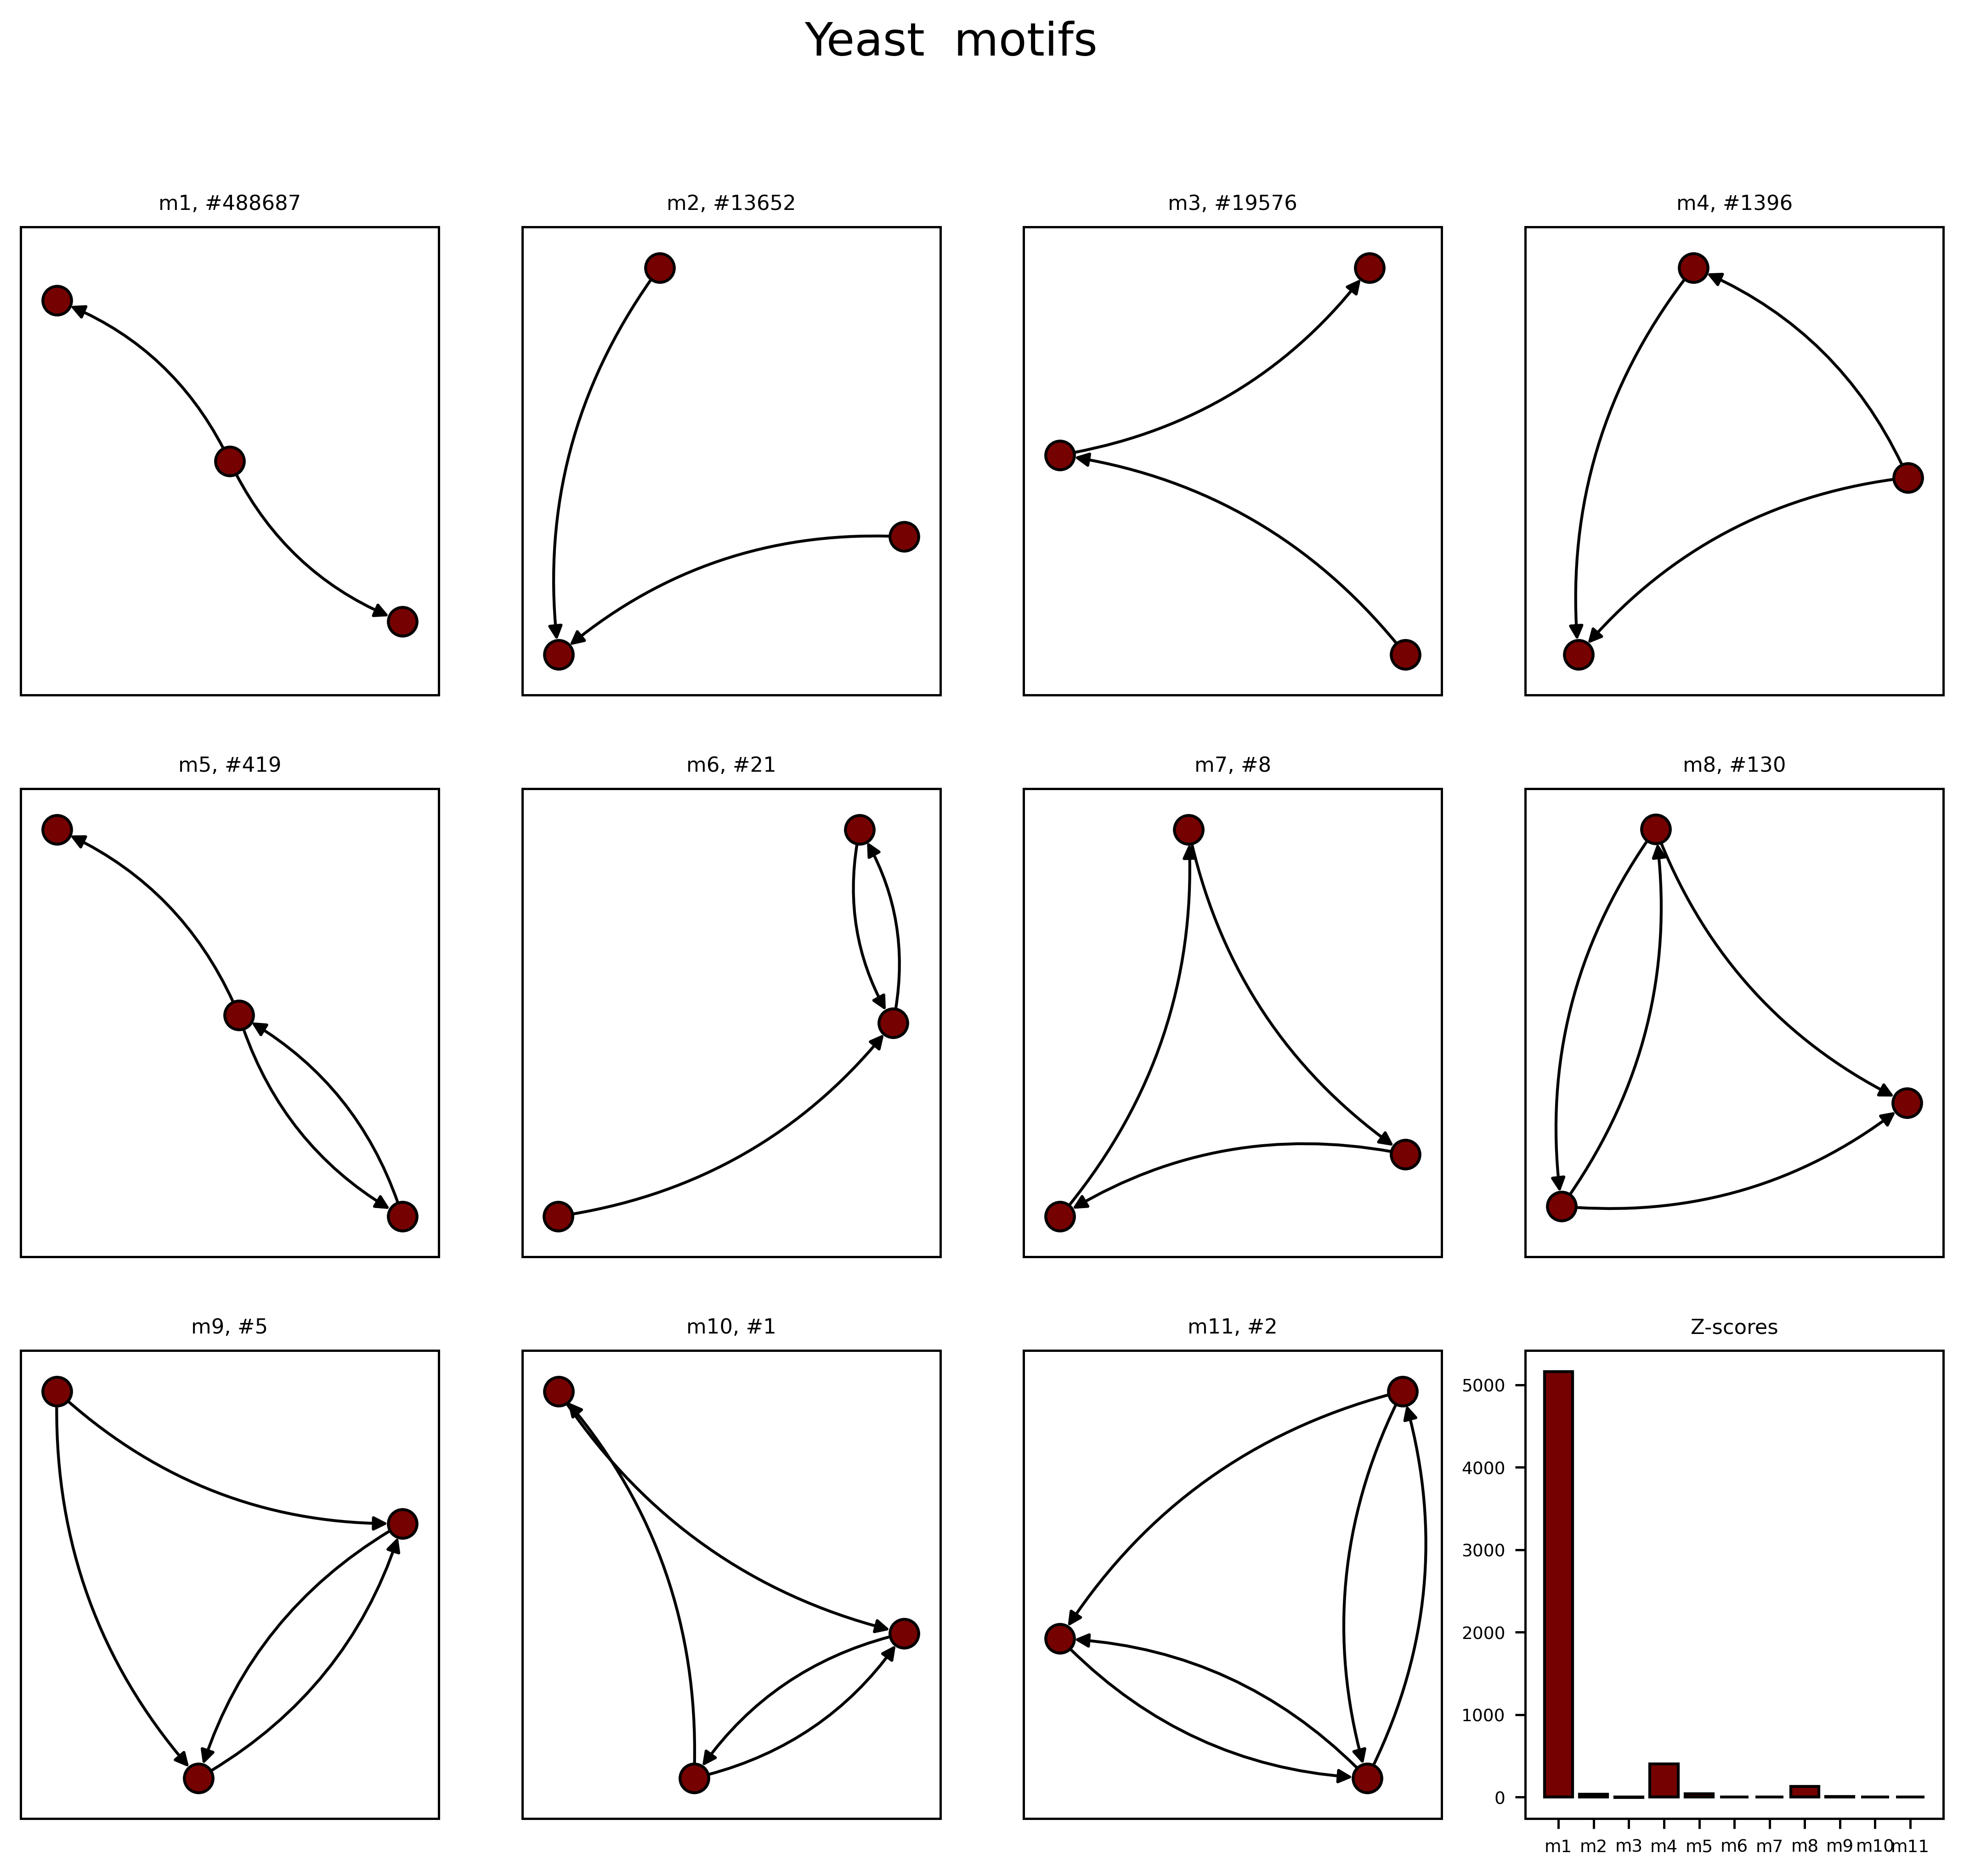

In [113]:
plot_motifs("Yeast ", motiflist1, sig_list1, motifs_nx1, "#750101")

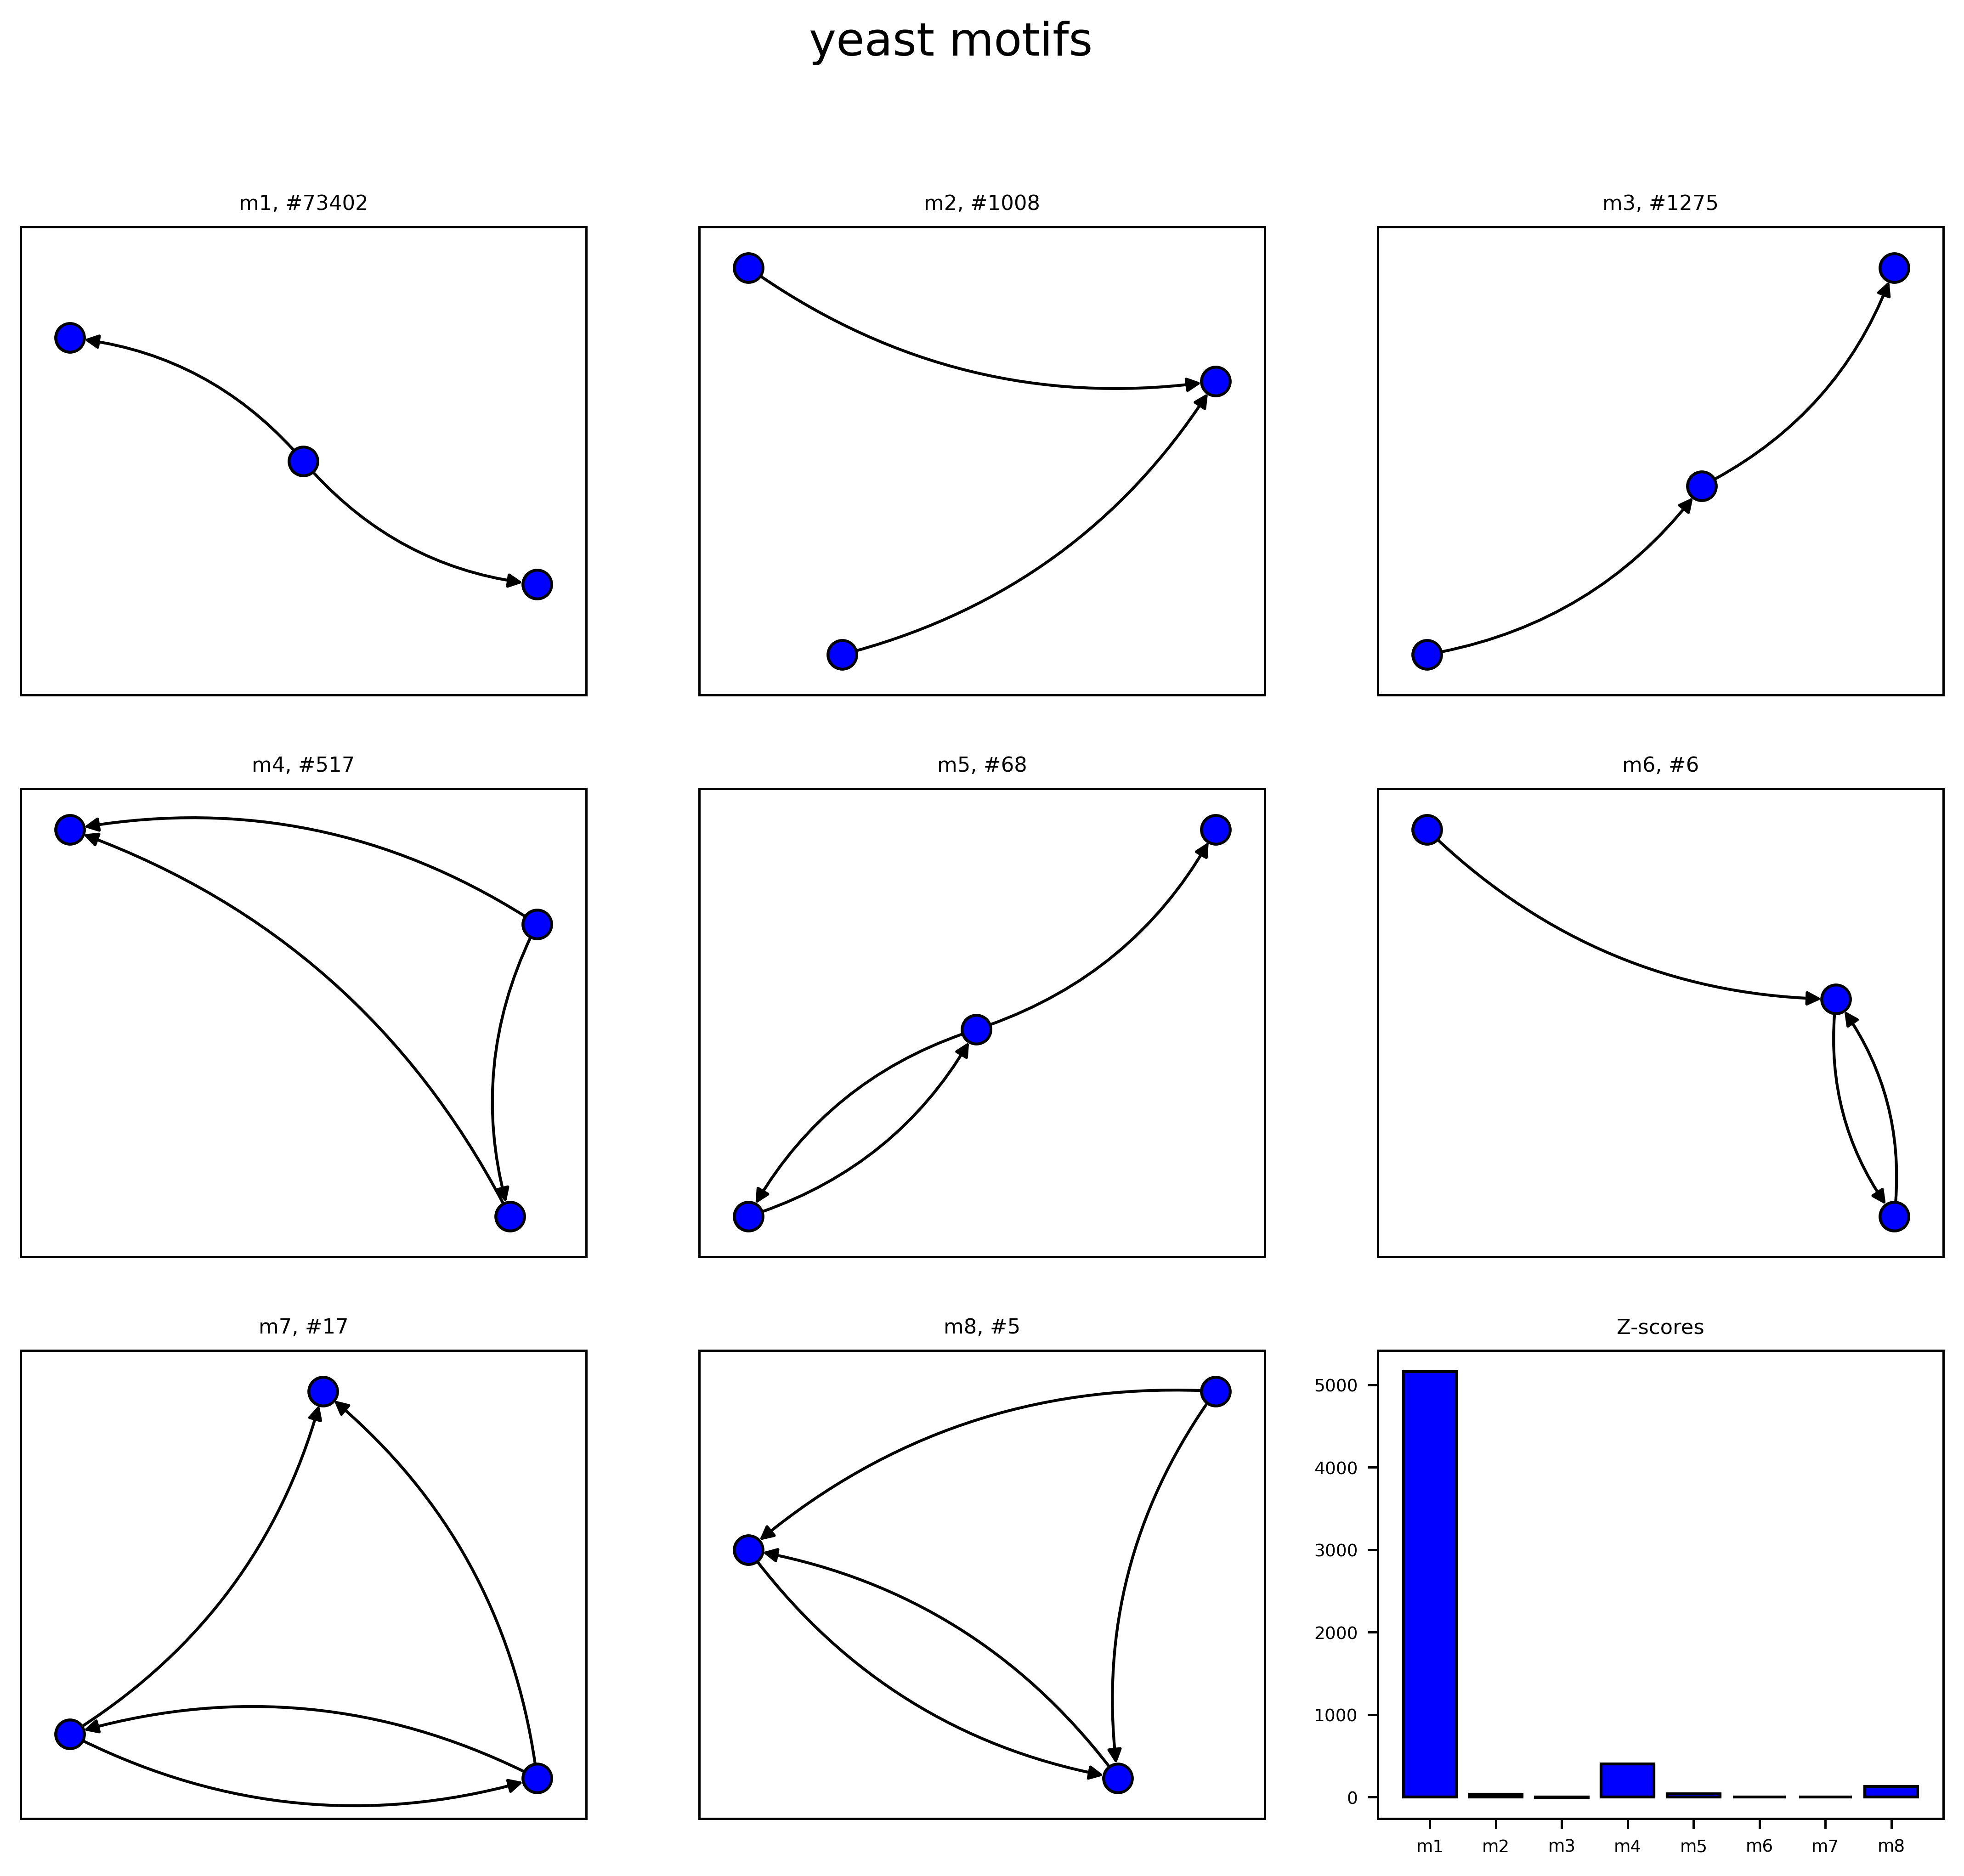

In [110]:
plot_motifs("Ecoli", motiflist2, sig_list2, motifs_nx2, "blue")

Here's the comparison of the two datasets' z-scores:

In [104]:
def plot_comparison(motiflist1, sig_list1, motifs_nx1, motiflist2, sig_list2, motifs_nx2):
    plt.rcParams.update({'font.size': 6})
    plt.rcParams['figure.dpi'] = 450
    n_motifs1    = len(motiflist1[0])
    n_motifs2    = len(motiflist2[0])
    #max_n_motifs = n_motifs1 if n_motifs1 > n_motifs2 else n_motifs2
    min_n_motifs = n_motifs1 if n_motifs1 < n_motifs2 else n_motifs2
    n = list()
    for i in range(1, min_n_motifs+1):
        n += [f"m{i}"]
    width = 0.4
    fig1 = plt.bar(n, sig_list1[1][0:min_n_motifs], color ='maroon', align='edge', width = 0.4)
    fig2 = plt.bar(n, sig_list2[1][0:min_n_motifs], color ='blue', align='edge', width = -0.4)
    plt.title(f"Z-scores: {filename1[5:10]} and {filename2[5:10]}")
    plt.show()

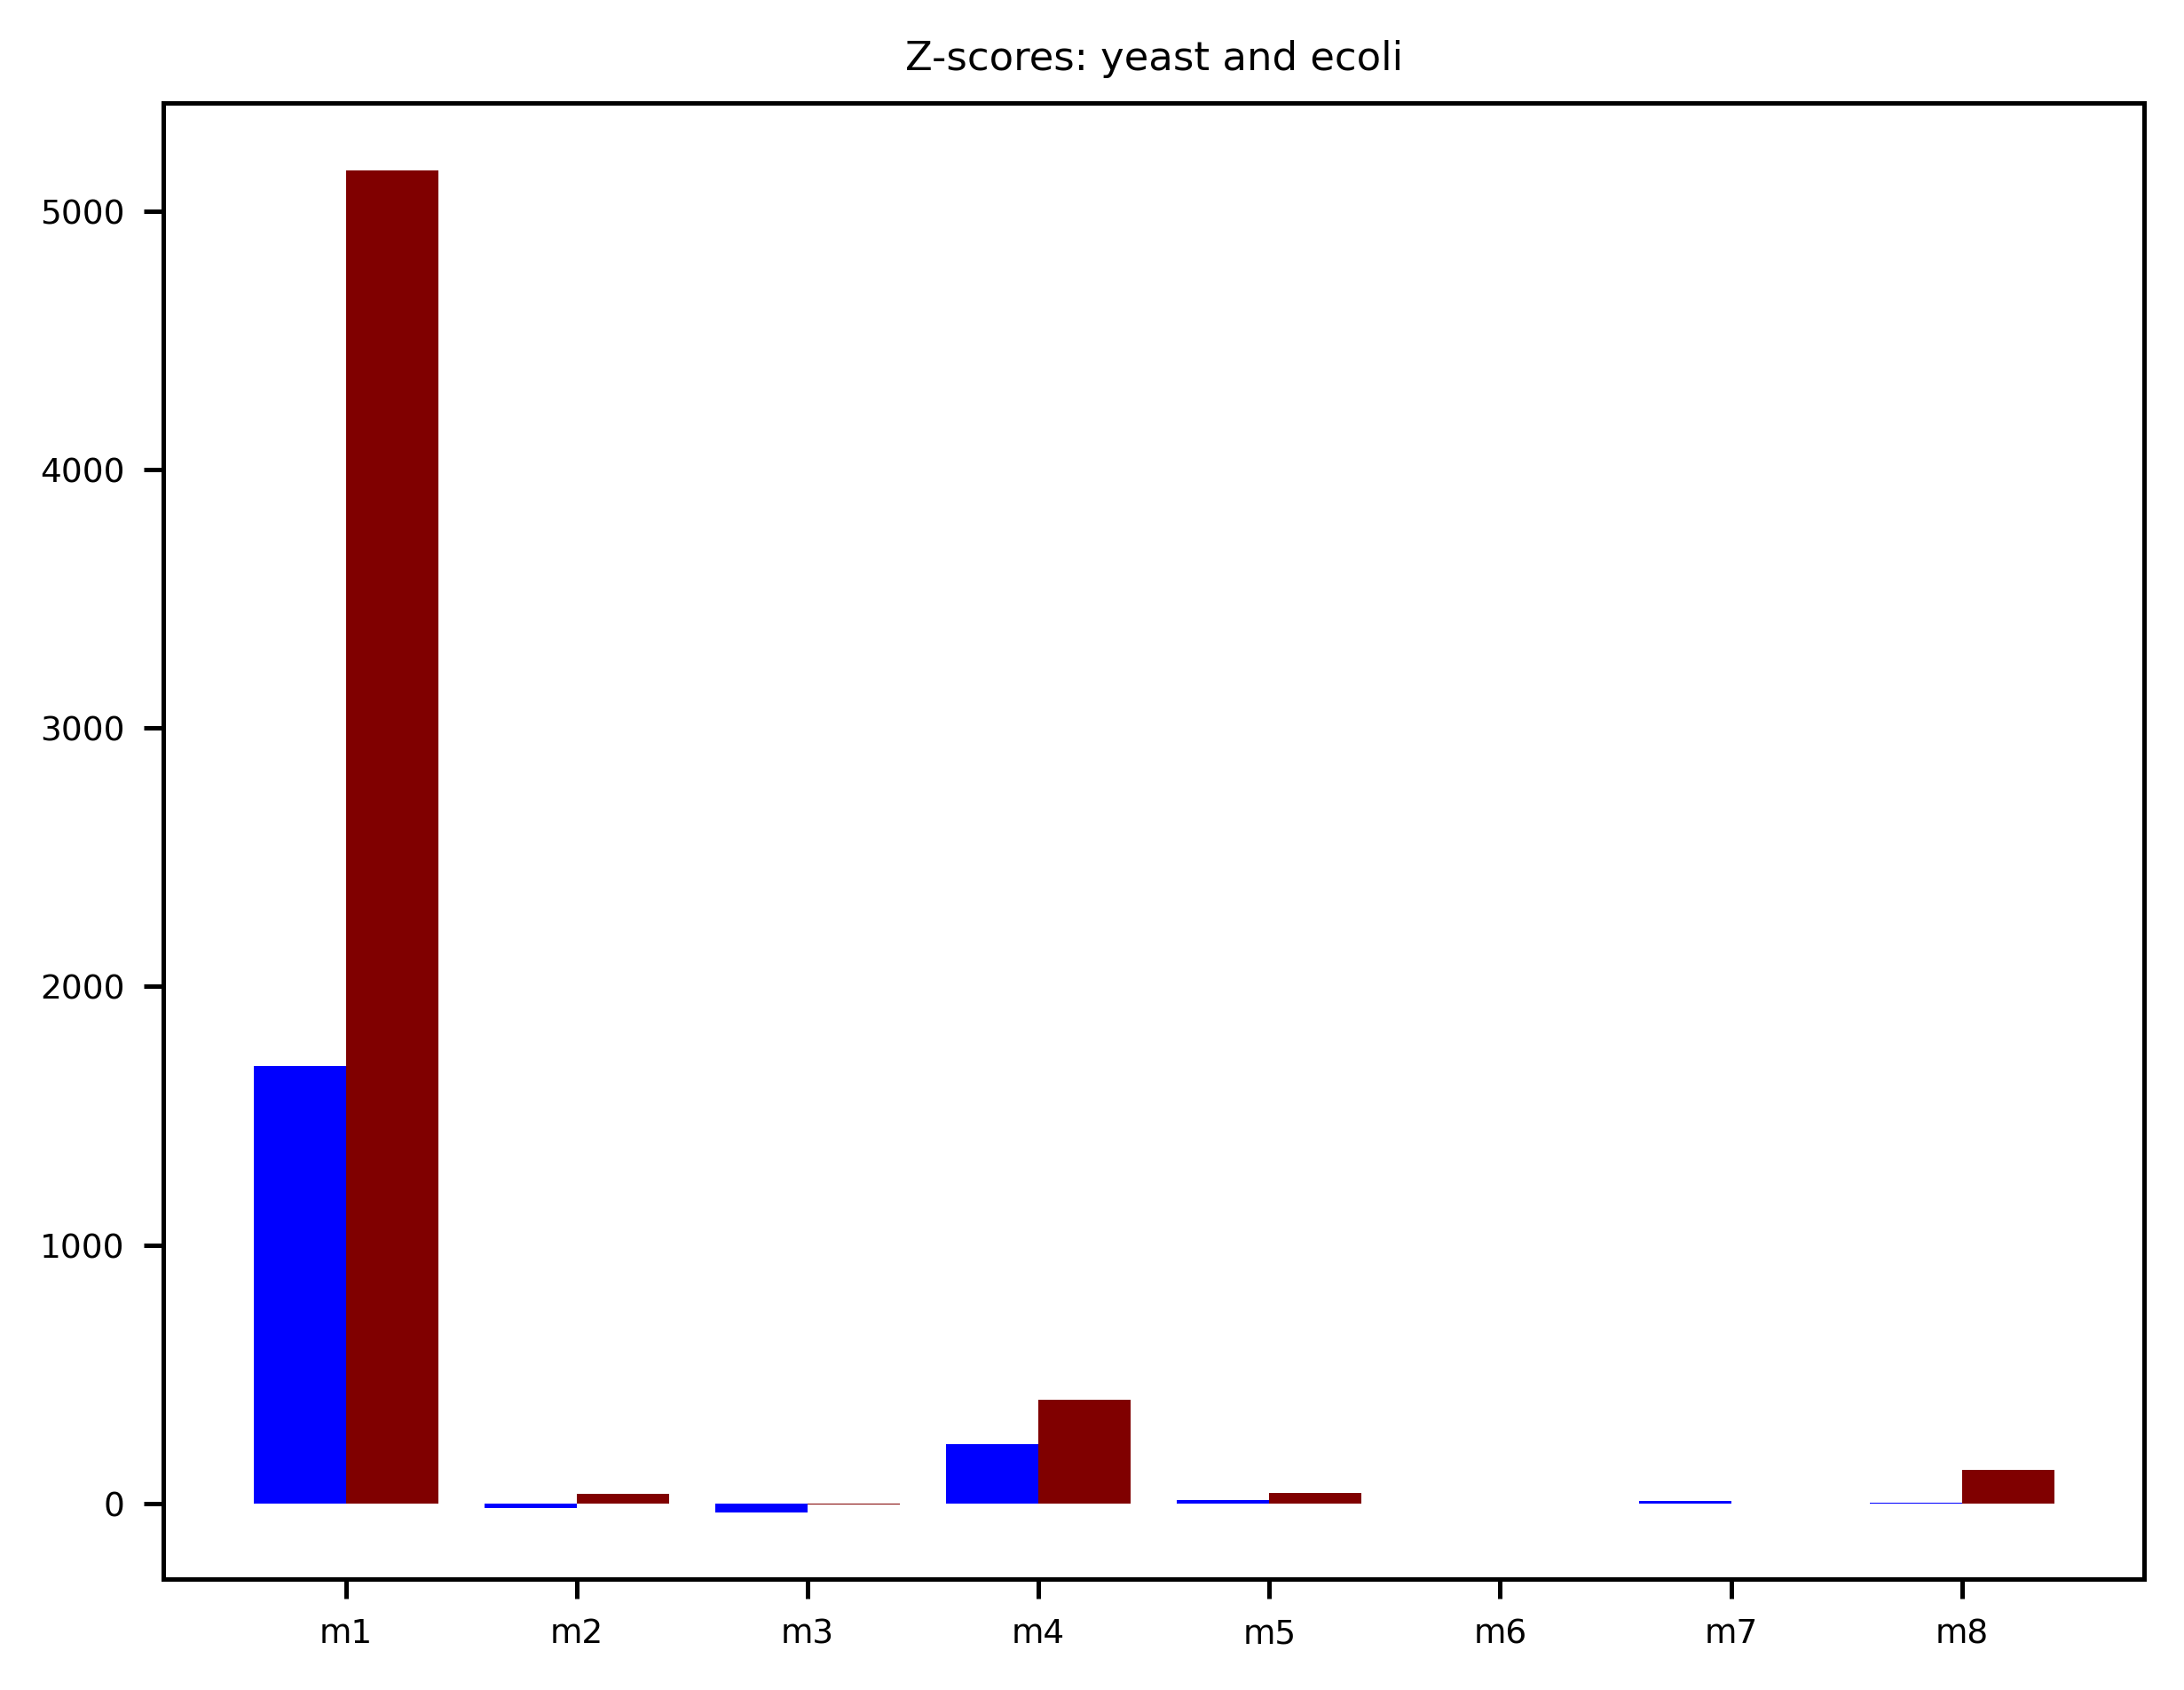

In [105]:
plot_comparison(motiflist1, sig_list1, motifs_nx1, motiflist2, sig_list2, motifs_nx2)

save the z scores in a file

In [106]:
def write_z_scores(filename, sig_list):
    with open(f"z-scores-{filename[5:10]}.txt", 'w') as output:
        output.write(f"Z-scores: {filename}\n")
        for i in range(len(sig_list[1])):
            output.write(str(sig_list[1][i]) + "\n")

In [107]:
write_z_scores(filename1, sig_list1)
write_z_scores(filename2, sig_list2)